In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [74]:
ts = np.array([0,0,0,1,1,5,10,15,30,60,120,300,420,600,600,900,1200,1800,3600])
counts = np.array([94,95,100,100,96,93,108,102,100,82,79,67,68,61,69,68,58,60,43])



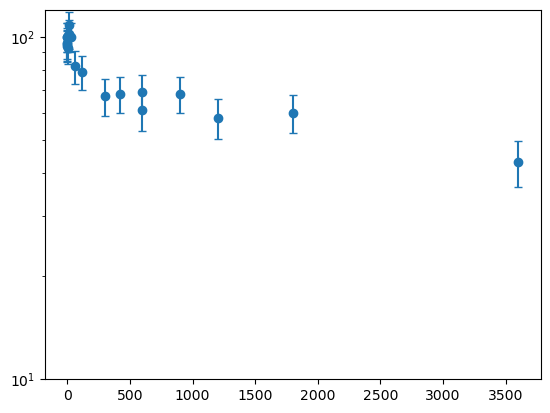

In [75]:
fig,ax = plt.subplots()
ax.scatter(ts,counts)
ax.set_ylim(10,120)
ax.errorbar(ts,counts,np.sqrt(counts),capsize = 3,ls = 'none')
ax.set_yscale('log')

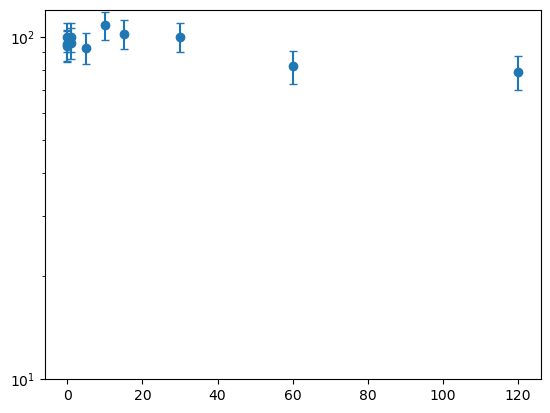

In [76]:
fig,ax = plt.subplots()
filter = ts<250
ax.scatter(ts[filter],counts[filter])
ax.set_ylim(10,120)
ax.errorbar(ts[filter],counts[filter],np.sqrt(counts)[filter],capsize = 3,ls = 'none')
ax.set_yscale('log')

[ 300  420  600  600  900 1200 1800 3600]
[67 68 61 69 68 58 60 43]
[  71.35059969 7563.40862403]
[   0.           36.36363636   72.72727273  109.09090909  145.45454545
  181.81818182  218.18181818  254.54545455  290.90909091  327.27272727
  363.63636364  400.          436.36363636  472.72727273  509.09090909
  545.45454545  581.81818182  618.18181818  654.54545455  690.90909091
  727.27272727  763.63636364  800.          836.36363636  872.72727273
  909.09090909  945.45454545  981.81818182 1018.18181818 1054.54545455
 1090.90909091 1127.27272727 1163.63636364 1200.         1236.36363636
 1272.72727273 1309.09090909 1345.45454545 1381.81818182 1418.18181818
 1454.54545455 1490.90909091 1527.27272727 1563.63636364 1600.
 1636.36363636 1672.72727273 1709.09090909 1745.45454545 1781.81818182
 1818.18181818 1854.54545455 1890.90909091 1927.27272727 1963.63636364
 2000.         2036.36363636 2072.72727273 2109.09090909 2145.45454545
 2181.81818182 2218.18181818 2254.54545455 2290.90909091 2

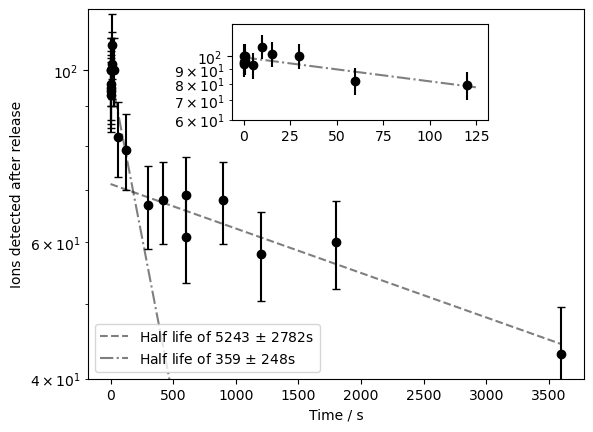

In [77]:
def expDecay(t,A,tau):
    return A*np.exp(-t/tau)

pGuess = [60,3000]
print(np.array(ts[ts>250]))
print(counts[ts>250])
popt,perr = curve_fit(expDecay,ts[ts>250],counts[ts>250],p0 = pGuess,sigma =np.sqrt(counts)[ts>250],absolute_sigma=True)

fig,ax = plt.subplots()
ax.scatter(ts,counts,color = 'k')
ax.set_ylim(40,120)
ax.errorbar(ts,counts,np.sqrt(counts),capsize = 3,ls = 'none',color = 'k')
ax.set_yscale('log')
print(popt)
tlin = np.linspace(0,3600,100)
print(tlin)
y = 20*np.ones_like(tlin)
ax.plot(tlin,popt[0]*np.exp(-tlin/(popt[1])),color = 'k',alpha = 0.5,ls = '--',label = r'Half life of {0} $\pm$ {1}s'.format('%.0f' % (popt[1]*np.log(2)), '%0.f' % np.sqrt(perr[1,1])))
print(popt[0]*np.exp(-tlin/(popt[1])))


left, bottom, width, height = [0.35, 0.65, 0.4, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.scatter(ts[filter],counts[filter],color = 'k')
ax2.errorbar(ts[filter],counts[filter],np.sqrt(counts)[filter],color = 'k',ls = 'None')
ax2.set_yscale('log')
ax2.set_ylim(60,130)

popt2,pcov2 = curve_fit(expDecay,ts[filter],counts[filter],sigma = np.sqrt(counts)[filter],absolute_sigma=True)
ax2.plot(np.linspace(0,125,100),popt2[0]*np.exp(-np.linspace(0,125,100)/popt2[1]),color = 'k', ls ='-.',alpha = 0.5)
ax.plot(tlin,popt2[0]*np.exp(-tlin/popt2[1]),color = 'k',alpha = 0.5,ls = '-.',label = r'Half life of {0} $\pm$ {1}s'.format('%.0f' % (popt2[1]*np.log(2)),'%.0f' % np.sqrt(pcov2[1,1])))
ax.set_xlabel('Time / s')
ax.set_ylabel('Ions detected after release')
ax.legend(loc = 'lower left')
print(np.sqrt(perr[1,1]))
print(np.sqrt(pcov2[1,1]))


plt.savefig('DecayTimes.pdf')